> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import collections as cnt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

>The collections module comes in handy later in helping to tally values separated by a "|" symbol.

In [2]:
#I'm happy I got both of these functions to work on the first try.

#takes in a dateframe and a column name.
def cruncher(frame, column_name):
    big_list = [] #initiates an empty list to be used to make a really big list that will be used to tally values
    for i in range(df.shape[0]): #sets the iteration to be by the row portion of the df.shape tuple.
        big_list += df[column_name].iloc[i] #adds the lists of each successive row together.
    tally = dict(cnt.Counter(big_list).most_common()) #uses the counter fucntion to tally all values in big_list into a dict.
    if 'none given' in tally.keys(): 
        del tally['none given'] #removes the 'none given' key and value if it's there.
    list_tally = list(tally.items()) #listifies the dictionary to print it and prime it for easier augmentation.
    return list_tally #returns a list of tuples of the tally dict.

''' 
The way in which the cruncher function is used further  
down in the code is equivalent to the following: 

genrinos = [x[0] for x in list_genres] #creates a list a genres
zeroes = [0]*len(list_genres) #creates a list of zeros

for j in range(len(genrinos)):
    for i in range(df.shape[0]):    
        if genrinos[j] in df['genres'].iloc[i]:#
            zeroes[j] += 1
genre_tallies = dict(zip(genrinos,zeroes))
'''
    

#Takes in the first value of a tuple, a dataframe, an empty list, and a string for a column name.
# I designed these functions in a way such  that they could be reused in the future for other times I
# am presented with multiple values within a cell and don't feel like making new rows to accommodate them.
def links(tuple_key, frame, averages, column_name):
    empty_list =[] #initiates an empty list to be filled with vote averages relative to the specified tuple_key.
    for i in range (frame.shape[0]): #uses the row value of the df.shape tuple as the range value
        if tuple_key in frame[column_name].iloc[i]: #searches for a match for the "key" portion of the input tuple via iteration of the input column
            empty_list.append(frame['vote_average'].iloc[i]) #appends a vote average from the column to the empty
    average_rating = sum(empty_list)/ len(empty_list) #creates a Mean Vote Average 
    return averages.append(average_rating)

>I decided to make a couple functions that would easy the redundancy of verbose code later on. Happy that I got them to work on the first try. 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
dataset = 'C:\\Users\\Typhonicus\\Desktop\\Udacity\\Python\\project3\\tmdb-movies.csv'
df = pd.read_csv(dataset)

for i in range(df.shape[1]):
    print(df.columns[i], type(df['{}'.format(df.columns[i])][i]))

print('')
print(df.info())

id <class 'numpy.int64'>
imdb_id <class 'str'>
popularity <class 'numpy.float64'>
budget <class 'numpy.int64'>
revenue <class 'numpy.int64'>
original_title <class 'str'>
cast <class 'str'>
homepage <class 'str'>
director <class 'str'>
tagline <class 'str'>
keywords <class 'str'>
overview <class 'str'>
runtime <class 'numpy.int64'>
genres <class 'str'>
production_companies <class 'str'>
release_date <class 'str'>
vote_count <class 'numpy.int64'>
vote_average <class 'numpy.float64'>
release_year <class 'numpy.int64'>
budget_adj <class 'numpy.float64'>
revenue_adj <class 'numpy.float64'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    

> The dates are in string format. I have to convert them to datetime

### The Plan
My plan is to clean stuff to a degree such I can provide lists of nested average ratings relative to the paramaters that have multiple values per cell in them (like the 'cast' column does) to try and suss out a ranking relative to the voting average. Afterwards, I plan on using pandas and matplotlib to try and answer some questions relative movie release date, budget, revenue, and voting average. 

### Data Cleaning 

 There is quite a bit that must be done. I didn't realize that some of it wasn't necessary until it was too late. I don't think the tagline, homepage, imbd_id, and overview columns are necessary for I want to do. It is for this reason that I drop them from the dataframe in the following code cell. I think the budget and revenue columns would only be useful if I took the the to calculate what the dollar amounts would be in 2018 dollars. Beyond casting the budget_adj and revenue_adj columns as integers, I think those columns are acceptable for my analysis instead.

 I'm hesitant to drop a lot of rows for certain aspects of my analysis as some movies with a null value for a particular column are still useful relative to other values in the same row with respect to the voting average value. I think the order in which I do so matters.  

Cleaning wise, I'm going to drop rows I don't want, convert the 'release_date' column, and replace the odd symbols in the dataframe with their proper equivalents. Afterwards, I'll fill certain null rows and drop others.

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['id','popularity','tagline','homepage','imdb_id','overview','budget','revenue','vote_count'], axis=1,inplace=True)

In [5]:
#In this block, I truncated the string date in each row...
year_trunc = lambda x : x[:-2] #... using a lambda function.
df['release_date'] = df['release_date'].apply(year_trunc)

#Then I changed the release year column to a string...
df['release_year'] = df['release_year'].astype(str) 

#...so I can add it to the release date. That way, 
# I can easily covert the release_date column to datetime. since I can use vectorized operations to "add" the strings.
df['release_date'] = df['release_date'] + df['release_year'] 

In [6]:
print(df['release_date'][0]) #checking to see if it worked.

6/9/2015


In [7]:
#This is the block where I finish converting to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format="%m/%d/%Y")
print(df['release_date'][0])

2015-06-09 00:00:00


In [8]:
df['release_month'] = df['release_date'].dt.month #adding a month column

In [9]:
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

>I think integer versions of the monetary values are more useful than floats relative to movie budgets and revenues.

In [10]:
df.replace({'Ã§' : 'ç', 'Ã³' : 'ó', 'Ã¡' : 'á', 'Ã±' : 'ñ', 'Ã©' : 'é',
            'Ã¶' : 'ö', 'Ã¤' : 'ä', 'Ã¬' : 'ì', 'Ã¼' : 'ü', 'Ã”' : 'Ô',
            'Ã¨' : 'è', 'Ã¦' : 'æ', 'Ã¢' : 'â', 'Ã²' : 'ò', 'Ã‰' : 'É',
            'Ã£' : 'ã', 'Ã´' : 'ō', 'Ã¯' : 'ï', 'Ã¹' : 'ù', 'Ã¥' : 'å',
            'Ã¸' : 'ø', 'Ãš' : 'Ú', 'Ãª' : 'ê', 'Ã‡' : 'Ç', 'ÃŸ' : 'ss',
            'Ã\xa0' : 'à', 'Ã˜l' : 'Ø', 'Ãž': 'Þ',    
        
            'Ã°' : 'ð', #this degree symbol looks identical to the one below, but apparently it isn't.
            'Ãº' : 'ú', 
            
            'Ã†' : 'Æ', 'Ã®' : 'î', 'Ã»' : 'û', 'Ã«' : 'ë', 'Ã­' : 'í',
            'Ã“' : 'Ó', 'ÄŸ' : 'ğ', 'Ã–' : 'Ö', 'Ã…' : 'Å', 'Ã€' : 'À'},inplace=True, regex=True)
#df[df['original_title'].str.contains('Ã')]
#df['cast'].iloc[3800] #test line

>It took forever to suss out, but I was able to munge all of the weird chararcters out and replace them with what they should be.

In [ ]:
df['keywords'] = df['keywords'].fillna('none given')
df['genres'] = df['genres'].fillna('none given')
df = df.dropna() 

>I wanted to save as much data as possible without dropping it from the dataset. Some movies lacked keywords and/or genres, but the rows still contained useful info to me, so I opted to simply fill these troublesome columns with 'none given'.
I dropped every other row with null data. 

In [11]:
 
#Most of the symbolic errors came in two's. For that reason, it was necessary that the next 
# line be executed last so as not to misattribute/mis-replace the symbols.
df.replace({'Ã' : 'Á', 'Á­' : 'í'}, inplace=True, regex=True) 
df[df['cast'].str.contains('Ã')] #check to see if no more exist in the cast column.

,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,release_month


>It was necessary to replace 'Ã' with 'Á' last since it is a single character string rather than a 2-character string like the ones I replaced above.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9780 entries, 0 to 10865
Data columns (total 13 columns):
original_title          9780 non-null object
cast                    9780 non-null object
director                9780 non-null object
keywords                9780 non-null object
runtime                 9780 non-null int64
genres                  9780 non-null object
production_companies    9780 non-null object
release_date            9780 non-null datetime64[ns]
vote_average            9780 non-null float64
release_year            9780 non-null object
budget_adj              9780 non-null int32
revenue_adj             9780 non-null int32
release_month           9780 non-null int64
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(7)
memory usage: 993.3+ KB


>The set was almost clean enough for my liking, I just needed to drop dupes

In [13]:
sum(df.duplicated())

1

>Only one dupe in the entire set.

In [14]:
df = df.drop_duplicates()

I used the follow block to convert columns that contain multiple values within their individual rows to lists so that I can use them in a lesser analysis using python. 

In [15]:
mixfix = lambda x : x.split('|') #a function that splits strings that have a '|' separator into lists

#I used the apply function to apply them to entire columns, where necessary.
df['cast'] = df['cast'].apply(mixfix) 
df['production_companies'] = df['production_companies'].apply(mixfix)
df['genres'] = df['genres'].apply(mixfix)
df['keywords'] = df['keywords'].apply(mixfix)
df['director'] = df['director'].apply(mixfix)
#for i in range(df.shape[0]):
#    mixfix(df['cast'].iloc[i])

## Lesser Analysis
From here forward, I will present tallies and averages relative to the columns that contain multiple values per cell. I will calculate a rudimentary "MMR" for each of the following paramaters. 

### Directors

To start, I use the cruncher function I made to help create ordered tuples based on a tally count by splitting dataframe cells that have more than one value in them. Then I use the links function I made to 

In [16]:
list_directors = cruncher(df, df.columns.values[2])
director_short_list = []    
for i in range(100):
    director_short_list.append(list_directors[i][0])
#---------------------------------------------------
sorted_directors = []
director_avg_list = []    
for director in director_short_list:
    links(director, df, director_avg_list, df.columns.values[2])
    sorted_directors.append(director)
#---------------------------------------------------
director_ratings = sorted(list(zip(sorted_directors, director_avg_list)), key=lambda x: x[1], reverse=True)

>I needed to find a way to sort a list of tuples by the second element in a tuple. 
>I found out how to do that here: https://stackoverflow.com/questions/10695139/sort-a-list-of-tuples-by-2nd-item-integer-value

In [17]:
print('DIRECTOR TALLIES\n')
for i in range(len(list_directors)):
    print('{}: {}'.format(list_directors[i][0], list_directors[i][1]))   

DIRECTOR TALLIES

Woody Allen: 43
Clint Eastwood: 34
Steven Spielberg: 30
Martin Scorsese: 28
Ridley Scott: 23
Steven Soderbergh: 23
Ron Howard: 22
Joel Schumacher: 21
Brian De Palma: 20
Barry Levinson: 19
Robert Rodriguez: 19
Tim Burton: 19
David Cronenberg: 19
Wes Craven: 19
John Carpenter: 19
Francis Ford Coppola: 18
Mike Nichols: 18
Walter Hill: 18
Robert Zemeckis: 17
Renny Harlin: 17
Rob Reiner: 17
John Landis: 17
Joel Coen: 17
Peter Hyams: 17
Roman Polanski: 17
Oliver Stone: 17
Norman Jewison: 17
Sidney Lumet: 17
Spike Lee: 16
Stephen Frears: 16
Tony Scott: 16
Stephen Herek: 16
Richard Donner: 16
Blake Edwards: 16
Richard Linklater: 15
Ivan Reitman: 15
Robert Altman: 15
Michael Apted: 15
Gus Van Sant: 15
Chris Columbus: 14
Roger Donaldson: 14
Joe Dante: 14
Uwe Boll: 14
John Badham: 14
Sam Raimi: 14
Neil Jordan: 14
Garry Marshall: 14
Sydney Pollack: 14
Quentin Tarantino: 13
Peter Jackson: 13
Phillip Noyce: 13
Peter Farrelly: 13
Lasse Hallström: 13
Terry Gilliam: 13
Tyler Perry: 13

David Ondaatje: 1
Thomas Jane: 1
Aleksandr Buravsky: 1
Gareth Carrivick: 1
Felix Van Groeningen: 1
Alex Merkin: 1
Sean Byrne: 1
Mark Baldo: 1
Kevin Hamedani: 1
Neal Brennan: 1
Danis TanoviÄ‡: 1
Anders Anderson: 1
Nia Vardalos: 1
Scott S. Anderson: 1
Jennifer Devoldère: 1
Dror Soref: 1
Howard Michael Gould: 1
Shinya Tsukamoto: 1
Jac Schaeffer: 1
Cherien Dabis: 1
Samuel Maoz: 1
Emmanuel Klotz: 1
Albert Pereira-Lazaro: 1
Tim Iacofano: 1
Andrew Lancaster: 1
Dolph Lundgren: 1
Dan Eckman: 1
Dean O'Flaherty: 1
James Hayman: 1
Brian King: 1
Kyle Rankin: 1
Benny Boom: 1
Julio DePietro: 1
Richard Harrah: 1
Gad Elmaleh: 1
Rob Williams: 1
Olivier Doran: 1
Enda McCallion: 1
Martin Barnewitz: 1
Jeff Balsmeyer: 1
Richard Crudo: 1
Bo Zenga: 1
Robert D. Siegel: 1
Giovanni Veronesi: 1
Simon Blakeney: 1
Stephen Lyle: 1
Abel Ferry: 1
Kevin Heffernan: 1
Dylan Avery: 1
Matt Lang: 1
Michael Storey: 1
Yann Moix: 1
Claire Denis: 1
Jake Goldberger: 1
Julien Nitzberg: 1
Gregory Doran: 1
R. W. Goodwin: 1
Ludovic 

Gerald Potterton: 1
Steve Gordon: 1
Saul Swimmer: 1
Umberto Lenzi: 1
Desmond Davis: 1
Burt Reynolds: 1
Mickey Rose: 1
Bruce D. Clark: 1
Charles Jarrott: 1
Tom DeSimone: 1
George Mihalka: 1
Frank De Felitta: 1
Ed Hunt: 1
Paris Barclay: 1
Kevin Yagher: 1
Annette Haywood-Carter: 1
Gilbert Adler: 1
Jim Wilson: 1
Hettie MacDonald: 1
Edward Burns: 1
Tim Pope: 1
Hart Bochner: 1
Jerry Zaks: 1
Michael Goldenberg: 1
Stanley Tucci: 1
Campbell Scott: 1
Farhad Mann: 1
Rick Friedberg: 1
Steven Baigelman: 1
Jason Bloom: 1
Larry Leker: 1
Paul Sabella: 1
Blair Treu: 1
Al Pacino: 1
Greg Spence: 1
Tom DeCerchio: 1
Jacques Audiard: 1
Krishna Rao: 1
Adam Grossman: 1
Diarmuid Lawrence: 1
Bill Couturié: 1
Jim Mallon: 1
Martin Lawrence: 1
Eric Leighton: 1
Rob LaDuca: 1
Robert C. Ramirez: 1
Ralph Eggleston: 1
Antony Hoffman: 1
Douglas McCarthy: 1
Stephen T. Kay: 1
Joe Charbanic: 1
Pontus Löwenhielm: 1
Patrick von Krusenstjerna: 1
Mamoru Hosoda: 1
Shigeyasu Yamauchi: 1
Edward Norton: 1
Janusz Kaminski: 1
Matt W

>Woody Allen was the most prolific director for the time period.

In [18]:
for i in range(len(director_ratings)):
    print(director_ratings[i])

('Quentin Tarantino', 7.3692307692307715)
('David Fincher', 7.209999999999999)
('Peter Jackson', 7.000000000000001)
('Joel Coen', 6.952941176470588)
('Martin Scorsese', 6.942857142857143)
('Danny Boyle', 6.941666666666666)
('David Lynch', 6.907692307692307)
('Jay Oliva', 6.83)
('Roman Polanski', 6.829411764705883)
('Steven Spielberg', 6.796666666666668)
('Robert Zemeckis', 6.705882352941176)
('Richard Linklater', 6.7)
('Werner Herzog', 6.7)
('Sam Peckinpah', 6.6909090909090905)
('Lasse Hallström', 6.684615384615385)
('Sidney Lumet', 6.682352941176471)
('Tim Burton', 6.678947368421054)
('Alan Parker', 6.658333333333334)
('Peter Weir', 6.641666666666666)
('Antoine Fuqua', 6.580000000000001)
('Kenneth Branagh', 6.57)
('Terry Gilliam', 6.546153846153847)
('Rob Reiner', 6.541176470588235)
('Edward Zwick', 6.530000000000001)
('Clint Eastwood', 6.508823529411764)
('Francis Ford Coppola', 6.5055555555555555)
('Mel Brooks', 6.49090909090909)
('Ken Loach', 6.49090909090909)
('Ridley Scott', 6.47

Based on the mean vote average rating. Uwe Boll was the worst director for the period

#### Cast Names

In [19]:
list_names = cruncher(df, df.columns.values[1])
for i in range(25):
    print('{}: {}'.format(list_names[i][0], list_names[i][1]))
#------------------------------------------------------    
name_short_list = []    
for i in range(500):
    name_short_list.append(list_names[i][0])

Robert De Niro: 72
Samuel L. Jackson: 70
Bruce Willis: 62
Nicolas Cage: 61
Michael Caine: 52
Robin Williams: 51
Morgan Freeman: 49
John Goodman: 48
John Cusack: 48
Liam Neeson: 47
Alec Baldwin: 47
Susan Sarandon: 47
Tom Hanks: 46
Julianne Moore: 46
Sylvester Stallone: 45
Dennis Quaid: 45
Gene Hackman: 45
Meryl Streep: 44
Willem Dafoe: 44
Ed Harris: 43
Johnny Depp: 43
Clint Eastwood: 43
Harrison Ford: 42
Anthony Hopkins: 42
Nicole Kidman: 42


>Above is the top 25 most prolific actors in descending order. Robert De Niro starred in the most movies

In [20]:
sorted_names = []
name_avg_list = []    
for name in name_short_list:
    links(name, df, name_avg_list,df.columns.values[1])
    sorted_names.append(name)

#for i in range(len(list_names)): = nightmare mode.

>This is probably super inefficient. It's taking a while to complete this action because there are so many names compared to genre to the genre column (which was the first item I tested this function on).

In [21]:
#Used to sort the tuple pairs by the second value
name_ratings = sorted(list(zip(sorted_names, name_avg_list)), key=lambda x: x[1], reverse=True)

In [22]:
for i in range(len(name_ratings)):    
    print(name_ratings[i])

('Daniel Radcliffe', 6.875000000000001)
('Brad Pitt', 6.7368421052631575)
('Leonardo DiCaprio', 6.733333333333334)
('Paul Newman', 6.720833333333334)
('Laura Dern', 6.689473684210528)
('Emily Watson', 6.678947368421053)
('Mark Ruffalo', 6.674074074074074)
('Scott Glenn', 6.61875)
('Ryan Gosling', 6.605882352941176)
('Kenneth Branagh', 6.600000000000001)
('Jack Lemmon', 6.5882352941176485)
('Mark Hamill', 6.5875)
('Tom Hanks', 6.5826086956521745)
('Anne Hathaway', 6.578260869565218)
('Ian McKellen', 6.576190476190476)
('Tom Hardy', 6.5736842105263165)
('Edward Norton', 6.563636363636363)
('Helena Bonham Carter', 6.562962962962962)
('Jessica Chastain', 6.540000000000001)
('Philip Seymour Hoffman', 6.5392857142857155)
('Christian Bale', 6.522580645161292)
('Geoffrey Rush', 6.509523809523809)
('Scarlett Johansson', 6.509375000000001)
('Denzel Washington', 6.502631578947368)
('Joaquin Phoenix', 6.4923076923076914)
('Alan Rickman', 6.488235294117647)
('Faye Dunaway', 6.4799999999999995)
('Ja

>Danny Radcliffe was the individual who was most likely to be in a good movie relative to the time period.    

#### Production Companies

In [23]:
#The next few blocks are of a similar vein of the director and name set.
list_companies = cruncher(df, df.columns.values[6])
company_short_list = []    
for i in range(100): #Only the top 100
    company_short_list.append(list_companies[i][0])
#---------------------------------------------------
sorted_companies = []
company_avg_list = []    
for company in company_short_list:
    links(company, df, company_avg_list, df.columns.values[6])
    sorted_companies.append(company)
#---------------------------------------------------
company_ratings = sorted(list(zip(sorted_companies, company_avg_list)), key=lambda x: x[1], reverse=True)

In [24]:
for i in range(25):
    print('{}: {}'.format(list_companies[i][0], list_companies[i][1]))

Universal Pictures: 522
Warner Bros.: 509
Paramount Pictures: 431
Twentieth Century Fox Film Corporation: 282
Columbia Pictures: 272
New Line Cinema: 219
Metro-Goldwyn-Mayer (MGM): 218
Walt Disney Pictures: 214
Touchstone Pictures: 178
Columbia Pictures Corporation: 160
TriStar Pictures: 147
Miramax Films: 139
Relativity Media: 108
Regency Enterprises: 95
Canal+: 92
Village Roadshow Pictures: 88
DreamWorks SKG: 88
20th Century Fox: 88
BBC Films: 87
Dimension Films: 82
United Artists: 76
Orion Pictures: 72
Fox Searchlight Pictures: 68
Castle Rock Entertainment: 68
Working Title Films: 67


>Universal pictures was the most prolific production company.

In [56]:
for i in range(25):
#for i in range(len(company_ratings)):    
    print(company_ratings[i])

('Pixar Animation Studios', 7.020454545454549)
('Walt Disney Animation Studios', 6.78)
('Marvel Studios', 6.759259259259259)
('British Broadcasting Corporation (BBC)', 6.6625000000000005)
('DC Comics', 6.6528301886792445)
('Warner Bros. Animation', 6.555319148936169)
('Channel Four Films', 6.5344827586206895)
('Film4', 6.502173913043479)
('Participant Media', 6.499999999999999)
('Scott Rudin Productions', 6.489743589743591)
('Walt Disney Productions', 6.483870967741934)
('Working Title Films', 6.471641791044778)
('Amblin Entertainment', 6.409230769230769)
('Malpaso Productions', 6.3891891891891905)
('DreamWorks Animation', 6.38913043478261)
('Fox Searchlight Pictures', 6.380882352941179)
('Scott Free Productions', 6.35952380952381)
('Legendary Pictures', 6.358974358974359)
('The Weinstein Company', 6.355813953488374)
('Studio Babelsberg', 6.34074074074074)
('HBO Films', 6.339393939393938)
('United Artists', 6.30263157894737)
('Mirage Enterprises', 6.3)
('Warner Premiere', 6.29999999999

Movies produced by Pixar were, on average, higher rated than those produced by others.

#### Genres

In [26]:
list_genres = cruncher(df, df.columns.values[5])
sorted_genres = []
genre_avg_list = []    
for i in range(len(list_genres)):
    links(list_genres[i][0], df, genre_avg_list,df.columns.values[5])
    sorted_genres.append(list_genres[i][0])
#-----------------------------------------------------------------
genre_ratings = sorted(list(zip(sorted_genres,genre_avg_list)), key=lambda x: x[1], reverse=True)

In [27]:
print('GENRE TALLIES\n')
for i in range(len(list_genres)):
    print('{}: {}'.format(list_genres[i][0], list_genres[i][1]))    

GENRE TALLIES

Drama: 4364
Comedy: 3433
Thriller: 2746
Action: 2235
Romance: 1570
Horror: 1526
Adventure: 1384
Crime: 1299
Science Fiction: 1136
Family: 1095
Fantasy: 840
Mystery: 773
Animation: 617
Music: 339
Documentary: 317
History: 306
War: 258
Western: 160
TV Movie: 132
Foreign: 120


>Dramas were the most common genre in the dataset.

In [28]:
for i in range(len(genre_ratings)):
    print(genre_ratings[i])

('Documentary', 6.9309148264984195)
('History', 6.416993464052286)
('Music', 6.413274336283183)
('Animation', 6.387358184764997)
('War', 6.309302325581395)
('Drama', 6.178391384051338)
('Crime', 6.128637413394929)
('Western', 6.094374999999999)
('Romance', 6.044585987261141)
('Family', 6.00255707762558)
('Mystery', 5.9604139715394515)
('Adventure', 5.951950867052026)
('Foreign', 5.934166666666665)
('Comedy', 5.894552869210603)
('Fantasy', 5.884523809523819)
('Action', 5.796823266219244)
('Thriller', 5.76700655498908)
('TV Movie', 5.690151515151518)
('Science Fiction', 5.671038732394369)
('Horror', 5.365792922673651)


>Documentaries edged out the field by a very wide margin. Odd that horror movies made during this time period were most likely to be poorly rated.

#### Keywords

In [29]:
list_keywords = cruncher(df, df.columns.values[3])
keyword_short_list = []    
for i in range(100):
    keyword_short_list.append(list_keywords[i][0])
#---------------------------------------------------
sorted_keywords = []
keyword_avg_list = []    
for keyword in keyword_short_list:
    links(keyword, df, keyword_avg_list, df.columns.values[3])
    sorted_keywords.append(keyword)
#---------------------------------------------------
keyword_ratings = sorted(list(zip(sorted_keywords, keyword_avg_list)), key=lambda x: x[1], reverse=True)

In [30]:
print('KEYWORD TALLIES\n')
for i in range(25):
    print('{}: {}'.format(list_keywords[i][0], list_keywords[i][1]))    

KEYWORD TALLIES

independent film: 339
woman director: 336
based on novel: 271
sex: 263
sport: 200
murder: 194
biography: 160
new york: 159
nudity: 153
suspense: 152
duringcreditsstinger: 147
musical: 147
female nudity: 144
revenge: 132
dystopia: 130
prison: 130
sequel: 127
high school: 125
london: 119
suicide: 112
friendship: 104
police: 100
rape: 92
detective: 91
holiday: 91


>Independent film was the keyword that was most used to describe a film.

In [31]:
print("Mean Voter Average Relative to Keywords\n")
for i in range(25):
    print(keyword_ratings[i])

Nested Average Ratings Relative to Keyword

('1970s', 6.591836734693878)
('marvel comic', 6.5200000000000005)
('music', 6.516326530612244)
('world war ii', 6.47529411764706)
('biography', 6.474999999999999)
('england', 6.342028985507246)
('based on novel', 6.3321033210332125)
('corruption', 6.331645569620252)
('father-son relationship', 6.326744186046513)
('prison', 6.311538461538461)
('paris', 6.303999999999999)
("love of one's life", 6.291666666666668)
('dc comics', 6.258000000000001)
('friendship', 6.232692307692305)
('brother brother relationship', 6.22738095238095)
('friends', 6.2266666666666675)
('adultery', 6.216923076923076)
('dancing', 6.197674418604652)
('journalist', 6.184722222222219)
('alcohol', 6.179999999999999)
('musical', 6.178231292517006)
('based on true story', 6.173913043478258)
('prostitute', 6.173749999999997)
('london', 6.163025210084037)
('california', 6.158695652173912)


>Interestingly, movies set in (or produced in?) the 1970s got highest average rating from voters.

<a id='eda'></a>
## Exploratory Data Analysis



###  Do movies released during a particular month have better averages ratings than others? 

In [32]:
monthly_averages = df.groupby(['release_month'])['vote_average'].mean()
monthly_averages

release_month
1     5.810710
2     5.926349
3     5.926522
4     5.869199
5     5.980728
6     6.011097
7     5.931608
8     5.818149
9     6.047425
10    5.931823
11    6.058832
12    6.176562
Name: vote_average, dtype: float64

> Here we see that movies released in december were, on average, rated higher than those released in other months with Janauary releases, on average, performing worst.

In [33]:
month_number = [x for x in range(1,13)] # create a list from 1 to 12
avg_month_rating = [x for x in monthly_averages[:] ] # appends data from monthly_averages to a list
month_labels = ['January', 'February', 'March', 'April',
                'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December']

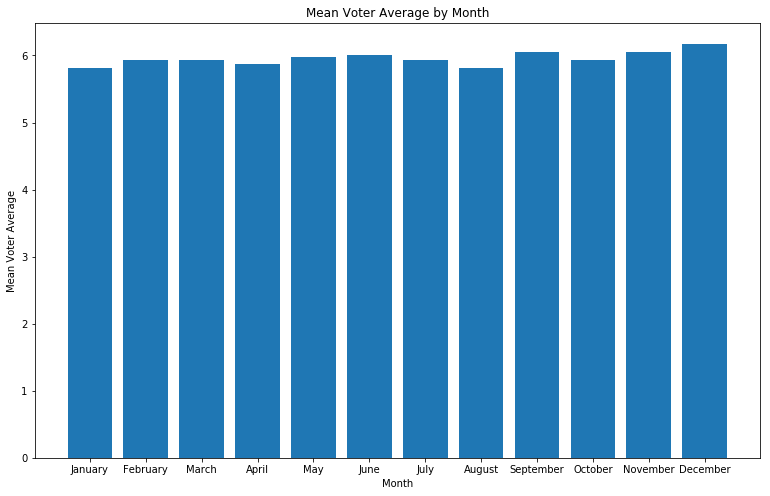

In [34]:
#using the ingredients above, I created a table for Mean Vote Average by Month
plt.figure(figsize=(13,8))
plt.bar(month_number, avg_month_rating, tick_label=month_labels)
plt.xlabel('Month')
plt.ylabel('Mean Vote Average')
plt.title('Mean Vote Average by Month');

>It looks like movies released in the month of December tended to be well-rated, but overall, this is pretty uniform.

### Is there a month that movies are most likely to be released?

In [35]:
#here I tally the number of releases by month of the year.
movie_tally_by_month = df.groupby(['release_month'])['original_title'].count()

In [36]:
movie_tally_by_month 

release_month
1      747
2      630
3      739
4      724
5      742
6      766
7      715
8      843
9     1204
10    1037
11     736
12     896
Name: original_title, dtype: int64

In [37]:
#getting practice in with list comprehensions.
movie_tallies = [x for x in movie_tally_by_month[:]]


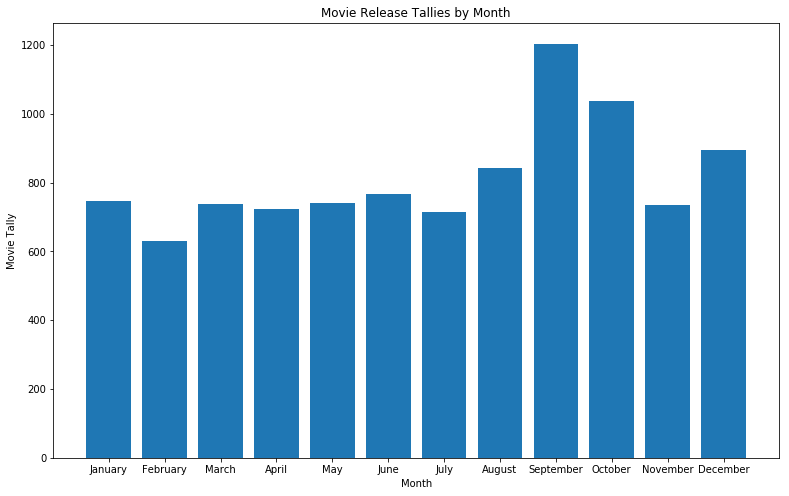

In [38]:
plt.figure(figsize=(13,8))
plt.bar(month_number, movie_tallies, tick_label=month_labels)
plt.xlabel('Month')
plt.ylabel('Movie Tally')
plt.title('Movie Release Tallies by Month');


> More movies were released in the month of **September** than for any other month. October wasn't too far behind. My assumption for October is that a bunch of scary or Halloween themed movies are released that month to try and cash in on the holiday vibe. I think the same was true for December and Christmas. 

>I'm at a loss with regards to September's tally. I thought that perhaps part of it had something to do with 9/11 and that maybe movies & documentaries that were released that month in commemoration of the event. But after performing a cursory investigation of the dataset, it seems as though movies about 9/11 were *never* released in September. 

In the Lesser Analysis I did, I showed that documentaries, on average, ended up being rated higher than other genres. Hmmm, maybe there are more movies of a certain genre released in September relative to other months? I tried for hours to find a way to do it since groupby isn't working for the release_month column for some reason. In the interest of not wasting time, I gave up.

### How does the mean vote average by year look like?

In [39]:
#My approach here is to group by release_year and find the Mean Vote Average by year.
stuff = df.groupby(['release_year'])['vote_average'].mean()
years = (list(tuple(dict(stuff)))) #I was just messing around here-- not sure how this worked, but I'll take it.
print(years)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


In [40]:
#Here, I force the values of the stuff object into a list so that I can use it to make a graph
avg_by_year = [x for x in stuff[:]]
print(avg_by_year)
year_number = [x for x in range(len(years))]

[6.325, 6.4333333333333345, 6.3866666666666685, 6.329411764705882, 6.224390243902438, 6.188235294117648, 6.086363636363635, 6.319444444444445, 6.37027027027027, 5.944827586206897, 6.417073170731706, 6.420000000000001, 6.524324324324323, 6.703636363636363, 6.404545454545453, 6.4523809523809526, 6.3717391304347855, 6.141818181818182, 6.139344262295082, 6.296428571428575, 6.145205479452054, 6.152564102564102, 6.2299999999999995, 5.951948051948055, 6.010101010101011, 6.184905660377358, 6.060550458715599, 6.149557522123897, 5.931060606060604, 6.066666666666664, 5.967460317460317, 6.050400000000002, 6.046825396825396, 6.038953488372091, 5.940229885057473, 6.0723529411764705, 5.867857142857141, 5.997777777777776, 5.98324607329843, 6.0523584905660375, 5.864467005076143, 5.907547169811319, 5.950207468879668, 5.925196850393702, 5.96363636363636, 5.82043343653251, 5.9391428571428575, 5.944730077120829, 5.92585034013606, 5.841684210526314, 5.963095238095241, 5.932017543859649, 5.756599999999996, 5

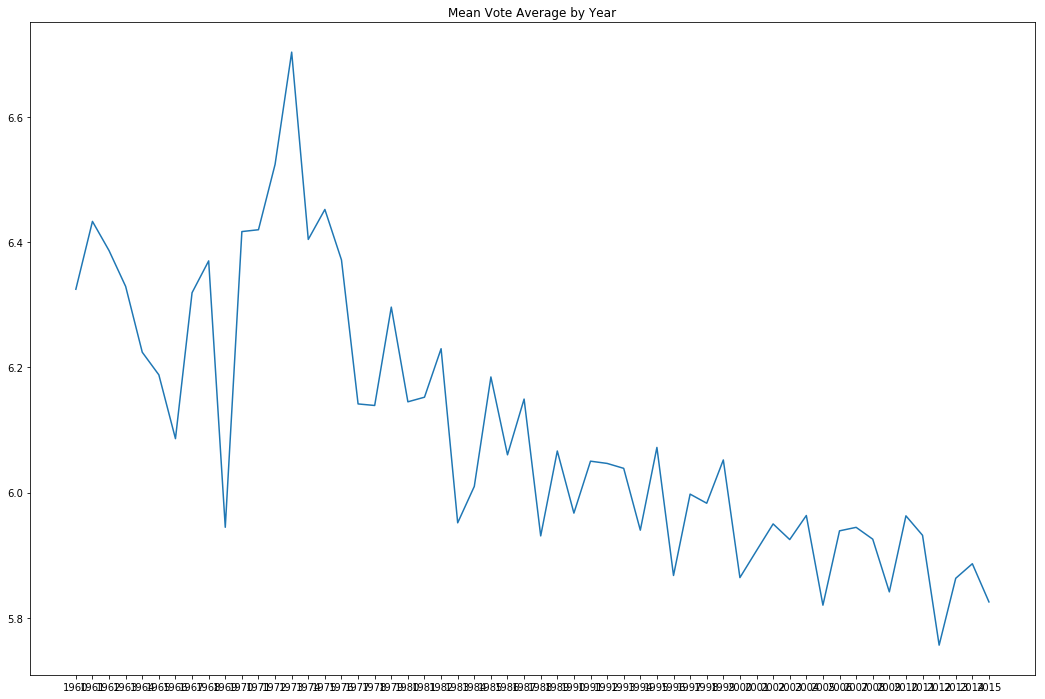

In [55]:
#using what I created, I can now make a a simple line graph.  
plt.figure(figsize=(18,12))
plt.plot(years, avg_by_year);
plt.title("Mean Vote Average by Year");

Well, that's interesting. Mean Vote Average appears to trend downward with time. Perhaps it's because there were more barriers to entry to the movie game early on than there was going forward making it easier for Joe Schmo's and randos to churn out trash films.

### Which movies tend to be rated higher based on length?

To answer this question I will the make levels/ tiers of length.

In [42]:
df['runtime'].describe()

count    9779.000000
mean      102.934349
std        27.896541
min         0.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

In [43]:
bin_edges = [df.runtime.describe()[3], 
             df.runtime.describe()[4],
             df.runtime.describe()[5],
             df.runtime.describe()[6],
             df.runtime.describe()[7]]

>So here's the thing, the describe method shows that something is wrong. I did a little research, and a lot of these movies with runtimes exceeding 300 minutes are actually TV mini-series packed into a box-set of DVDs. I was going to use the values output by the describe method as bin edges for the next question I want to answer, but obviously a 90 minute movie wouldn't (or at least shouldn't) be considered a "short film." 

> Also, after doing more research, each and every film that is listed as having a runtime of '0'  actually has a much longer duration. The rest appear to be accurate (well, other than the TV-series masquerading as movies-- maybe I should just drop those rows...).

> That being said, I've decided to create my own arbitrary bin edges. 

In [44]:
#I like to do this whenever I make bins. It helps me understand what's going on 
# and I think it helps whoever is reviewing my code understand my intent:

runtime_bin_edges = [0,           60,       160,     200,             877]
runtime_bin_names = [ 'short film', 'normal',  'long',  'mini-series?']

In [45]:
df['runtime_length'] = pd.cut(df['runtime'], runtime_bin_edges, labels=runtime_bin_names)

In [46]:
df.head()

,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,release_month,runtime_length
0,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,6.5,2015,137999939,1392445892,6,normal
1,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,7.1,2015,137999939,348161292,5,normal
2,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,6.3,2015,101199955,271619025,3,normal
3,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,7.5,2015,183999919,1902723129,12,normal
4,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",[James Wan],"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,7.3,2015,174799923,1385748801,4,normal


In [47]:
runtime_rating_means = df.groupby(['runtime_length'])['vote_average'].mean() 
runtime_rating_mean_values = [runtime_rating_means[0], runtime_rating_means[1],
                              runtime_rating_means[2], runtime_rating_means[3]]


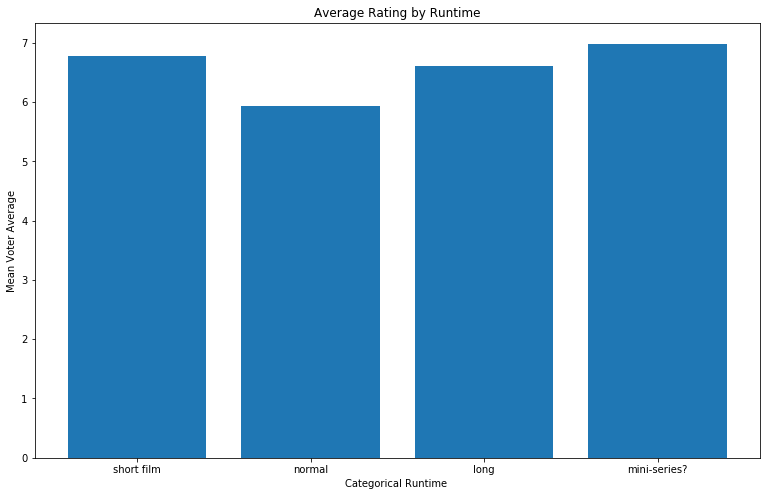

In [48]:
plt.figure(figsize=(13,8))
plt.bar([1,2,3,4], runtime_rating_means, tick_label=runtime_bin_names)
plt.title("Average Rating by Runtime")
plt.xlabel("Categorical Runtime ")
plt.ylabel("Mean Voter Average");

>Mini-series and long-running documentaries appear to tend to have been rated highest. Interestingly, movies with a length in the normal range were rated lowest, on average..

### Relative to the budget, which movie netted most money?

So for this question, the data is clearly and significantly incomplete. Some rows lack a budget, but have a revenue and vice versa (then again, a lot of movies flopped and that's a valid explanation for the inverse). That being said, for this question in particular, I need rows with a non-zero budget and a non-zero revenue.  

In [49]:
df.shape

(9779, 14)

In [50]:
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [51]:
df_nz = df.query('budget_adj > 0 & revenue_adj > 0')
df_nz.shape

(3800, 15)

In [52]:
df_nz.head()

,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,release_month,runtime_length,profit
0,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,6.5,2015,137999939,1392445892,6,normal,1254445953
1,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,7.1,2015,137999939,348161292,5,normal,210161353
2,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,6.3,2015,101199955,271619025,3,normal,170419070
3,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,7.5,2015,183999919,1902723129,12,normal,1718723210
4,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",[James Wan],"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,7.3,2015,174799923,1385748801,4,normal,1210948878


In [53]:
df_nz['profit'].idxmax()

9806

In [54]:
df_nz.loc[9806]

original_title                                                       Jaws
cast                    [Roy Scheider, Robert Shaw, Richard Dreyfuss, ...
director                                               [Steven Spielberg]
keywords                [fishing, atlantic ocean, bathing, shipwreck, ...
runtime                                                               124
genres                                      [Horror, Thriller, Adventure]
production_companies       [Universal Pictures, Zanuck/Brown Productions]
release_date                                          1975-06-18 00:00:00
vote_average                                                          7.3
release_year                                                         1975
budget_adj                                                       28362748
revenue_adj                                                    1907005841
release_month                                                           6
runtime_length                        

> **Jaws**, when adjusting for inflation, is the most profittable movie in the set. 

<a id='conclusions'></a>
## Conclusions

In summation: 
Woody Allen was the most prolific director in the dataset, which is to say that he directed the most movies.
Of the 100 most prolific directors, Quentin Tarantino's was the most well-received director with his movies receiving the highest Mean Vote Average. Appropriately, Uwe Boll's movies were the most poorly received.

Robert DeNiro starred in the most movies. Daniel Radcliff had the highest Mean Vote Average relative to the movies he starred in. Jean-Claude Van Damme, Steven Seagal, and Danny Trejo were rated worst 
I ended up using the mean vote average as a rudimentary rating system similar to rating systems  found in team-based video-games like Overwatch or Dota 2 (MMR) that are used to rate and rank players not necessarily by their individual skill, but how often they win versus how often they lose. Over time, individual players are sorted into tiers based on how who they beat and who they lost. The assumption being that if a player keeps winning despite being on a team each game, that player's actions must be influencing the outcome of the game to his or her favor. 

Universal Pictures was the most prolific individual production company. As for the Mean Vote Average, films produced by Pixar  Animation received the highest ratings, on average. 

That is roughly how I see the mean vote average statistic relative to actors and genres. The major difference being different "tiers" of winning and losing for them, rather than the simple binary of winning and losing.

With regards to genres, films of the Drama genre were produced the most. Documentaries received the highest ratings on average whereas horror films received the lowest. 

'Independent film,' 'woman director,' 'based on novel,' and 'sex' were the keywords that were most attributed to the movies. Interestingly, films made in or set in the '1970s' were rated better than any other keyword, and by a significant margin.

Something I devoted a lot of time to attempting was trying to find a way to make groupby work with my release_month column so that I could tally genres by month. It is my suspicion that more documentaries were released during the month of September which could explain why there is a significance increase in the amount of high rated movies released during that month. I figured it had something to do with documentaries because of 9/11 or something, but that doesn't appear to be true. I attempted a pure python approach instead using a nested for loop similar to the one commented below the cruncher function I made, but I couldn't make it work exactly as I wanted it to.


Another problem I had had to to do several elements of my Lesser Analysis, I couldn't include the whole dataset in computations of some metrics because it took so long to calculate. Like, minutes long. I opted to just use the top 500 most prolific actors and actresses to save time. My pandas-fu isn't as strong as it could be at the moment (I didn't want to make multiple rows for different cast members and splitting them up that way, but I could have). 